# SmartInternz

# Project: Health Insurance-Premium-Prediction

# Name : Rijoy Paul 

# Institution: Christ University, Bangalore


# Problem Statement:

## One major issue in Health insurances with the common people or new users is  to estimate the cost of premiums to decide which would be the best for them. This project aims at building a web App that automatically estimates premium cost by taking the input values from user.   

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data =pd.read_csv('Insurance.csv') #Reads the file as csv
data.head() #filters the first top datas in dataset 

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape #size of the dataset

(1338, 7)

In [5]:
data.describe() 

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Null Value identifcation

In [135]:
data.isnull().sum() #displays the null value counts for each parameters

Year        0
Age         0
Agesq       0
Nbh         0
Cbd         0
Intst       0
Lintst      0
Price       0
Rooms       0
Area        0
Land        0
Baths       0
Dist        0
Ldist       0
Wind        0
Lprice      0
Y81         0
Larea       0
Lland       0
Y81Ldist    0
Lintstsq    0
Nearinc     0
Y81Nrinc    0
Rprice      0
Lrprice     0
dtype: int64

### So the above null value count displays that there is no null values present in the dataset for each parameters.

In [8]:
data_columns=data.columns #columns in dataset
data_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [9]:
from collections import Counter as c
print(c(data.sex))
print(c(data.smoker))
print(c(data.region))

Counter({'male': 676, 'female': 662})
Counter({'no': 1064, 'yes': 274})
Counter({'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324})


## Label Encoding 

In [10]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data.sex=le.fit_transform(data.sex)
data.smoker=le.fit_transform(data.smoker)
data.region=le.fit_transform(data.region)
print(c(data.sex))
print(c(data.smoker))
print(c(data.region))

Counter({1: 676, 0: 662})
Counter({0: 1064, 1: 274})
Counter({2: 364, 3: 325, 1: 325, 0: 324})


# Correlation

In [13]:
data.corr() 

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.004588,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,0.157439,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157439,0.016569,-0.002181,1.000000,-0.006208
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,-0.006208,1.000000


## Correlation visulaization using Heatmap 

<AxesSubplot:>

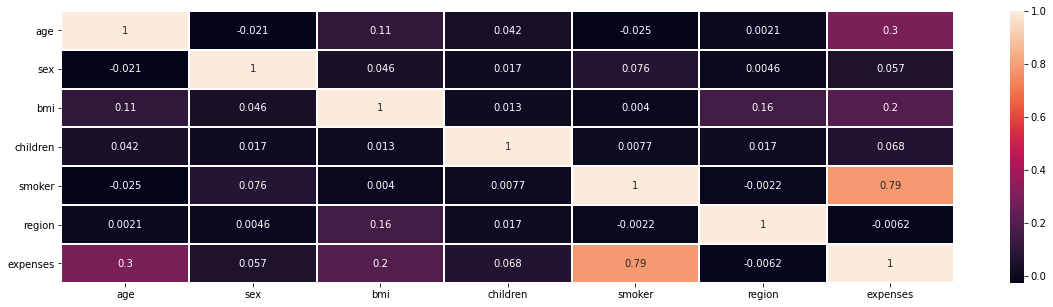

In [14]:
plt.figure(figsize = (20,5))
sns.heatmap(data.corr(),annot=True,linewidths=1)

### From the  above Correlation Matrix and Heatmap is evident that variables say: age, gender, bmi, children, smoker, region have a positive correlation and age and smoker have a high correlation. Although age and smoker have a high correlation other attributes also contribute as their diffrence is comparitively low. Hence these are the parameters to be used as input variables for building  the model

## Visualizations

In [6]:
data_columns=data.columns #columns in dataset
data_columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

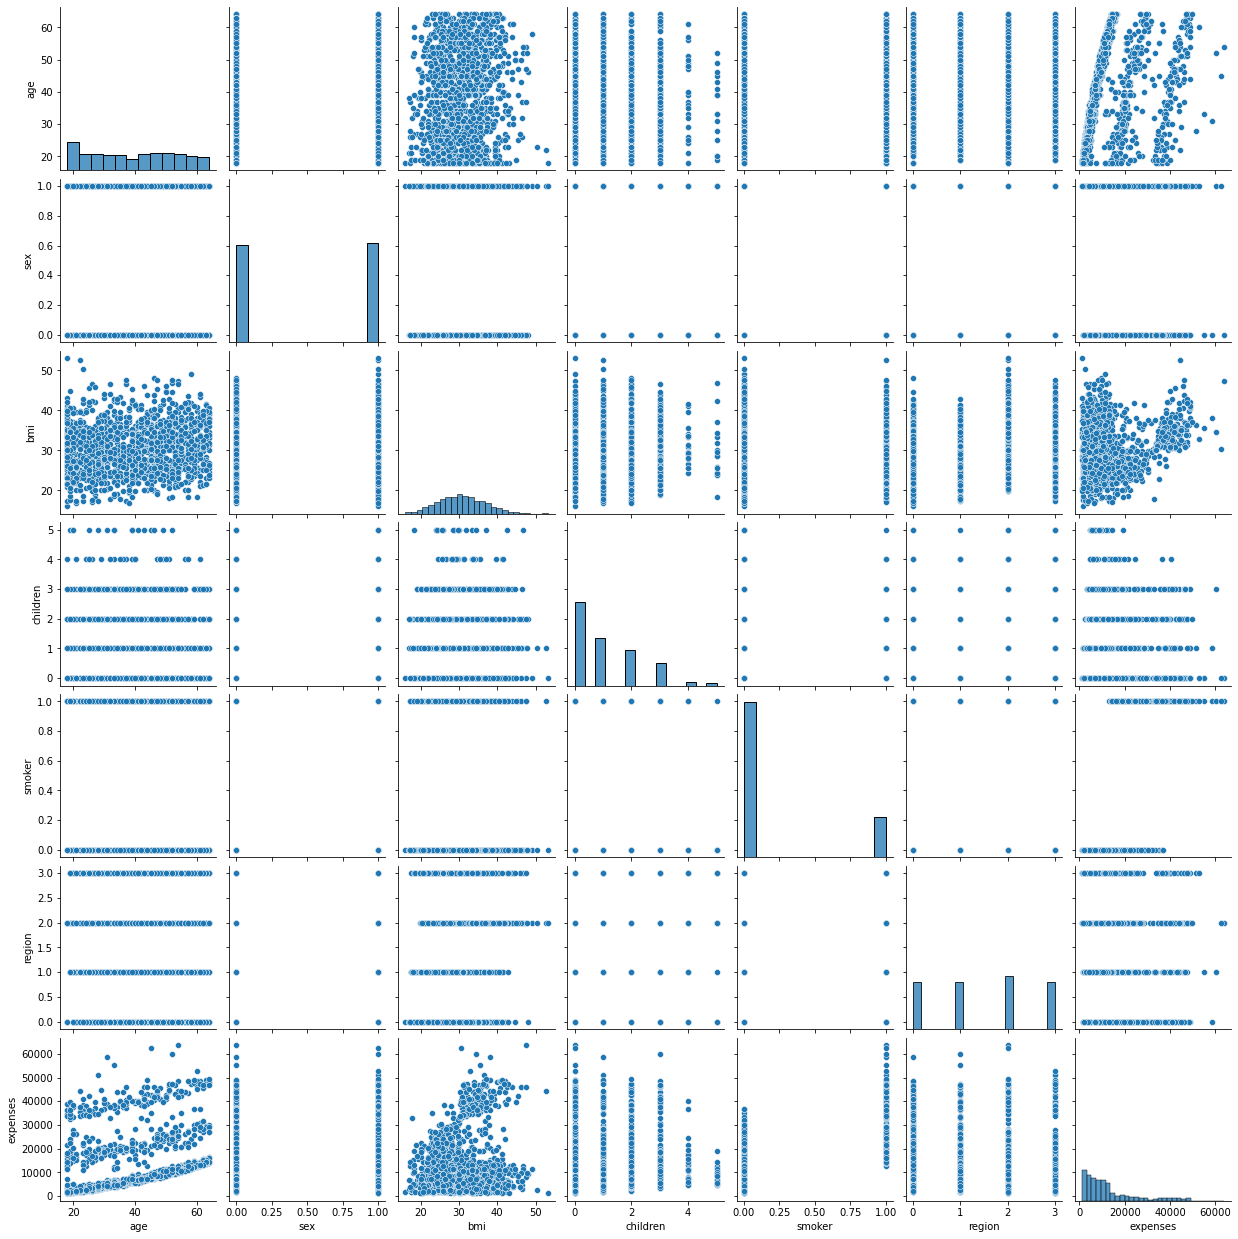

In [16]:
sns.pairplot(data,diag_kind="hist")

Text(0, 0.5, 'Expenses')

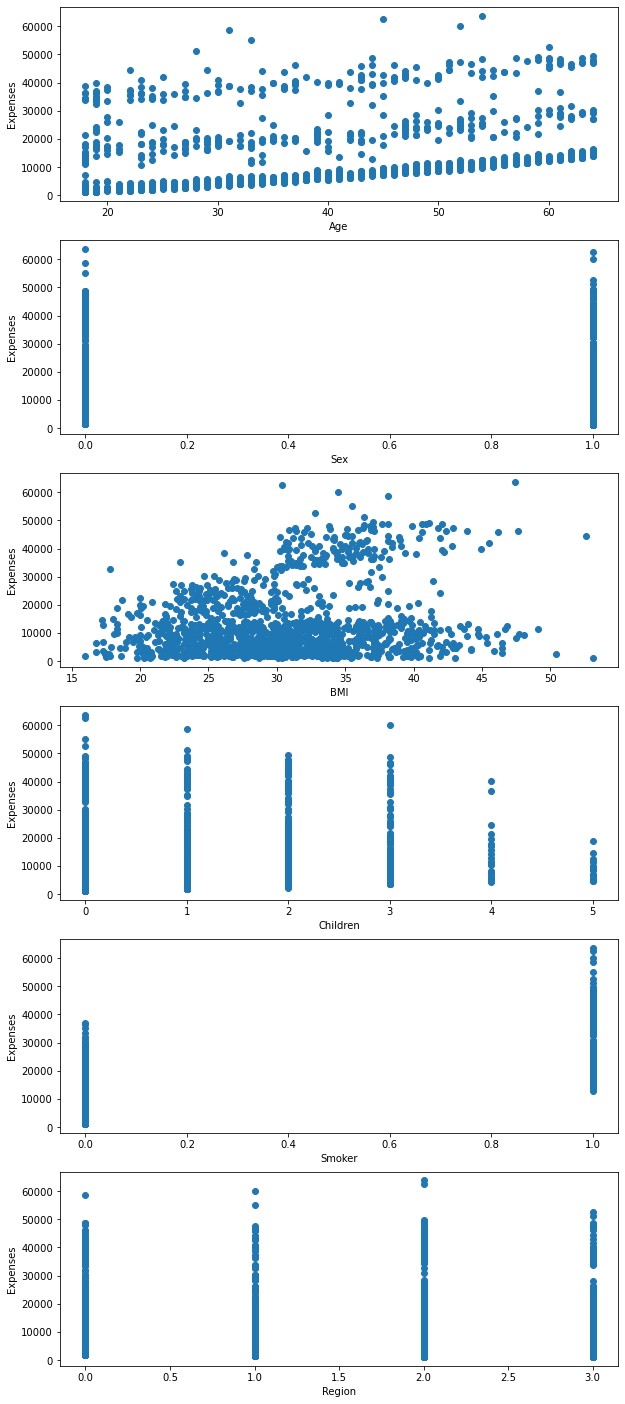

In [17]:
fig, ax = plt.subplots(6, figsize=(10, 25))
ax[0].scatter(x = data['age'], y = data['expenses'])
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Expenses")

ax[1].scatter(x = data['sex'], y = data['expenses'])
ax[1].set_xlabel("Sex")
ax[1].set_ylabel("Expenses")

ax[2].scatter(x = data['bmi'], y = data['expenses'])
ax[2].set_xlabel("BMI")
ax[2].set_ylabel("Expenses")

ax[3].scatter(x = data['children'], y = data['expenses'])
ax[3].set_xlabel("Children")
ax[3].set_ylabel("Expenses")

ax[4].scatter(x = data['smoker'], y = data['expenses'])
ax[4].set_xlabel("Smoker")
ax[4].set_ylabel("Expenses")

ax[5].scatter(x = data['region'], y = data['expenses'])
ax[5].set_xlabel("Region")
ax[5].set_ylabel("Expenses")

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

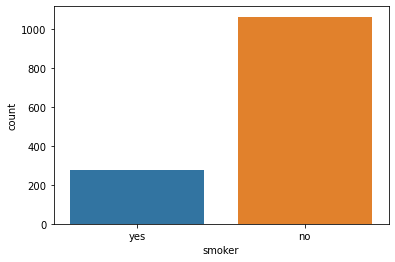

In [5]:
sns.countplot(data['smoker'])

### This indicates that 'smoker' column in the dataset is significant as the smoking preference in the data also contribute to the changes in insurance premium charges. Also this shows that the insurance companies are more keen on non smokers.

## Extracting required Independent & Dependent variables 

In [11]:
predmod_columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region']


## Independent & Dependent variables

### age, gender, bmi, children, smoker, region are taken as the Input  variables(Independent) and expense as Target variable(Dependent) for the model.

In [19]:
predmod_columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [12]:
x=data.iloc[:,0:6]
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [13]:
y=data.iloc[:,6:]
y.head()

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


## Split the dataset to Train and Test data

In [14]:
from sklearn.model_selection import train_test_split
tts=train_test_split
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0)

print(x_train.shape) #training input
print(y_train.shape) #training output
print(x_test.shape)#testing input
print(y_test.shape)#testing output

(1070, 6)
(1070, 1)
(268, 6)
(268, 1)


##  1. Multiple Linear Regression Model (Model Building)

In [42]:
#model Building

from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

#### Input Variable: age, gender, bmi, children, smoker, region
#### Output Variable: expense

In [26]:
y_test[:5]

,expenses
578,9724.53
610,8547.69
569,45702.02
1034,12950.07
198,9644.25


In [29]:
mlr.predict(x_test[:5])

array([[11016.49787742],
       [ 9796.8325871 ],
       [38004.81817394],
       [16128.17665663],
       [ 6945.5990141 ]])

## Model Accuracy

In [43]:
from sklearn.metrics import r2_score

r2_score(y_test,mlr.predict(x_test))

0.7999053396503136

## 2. Random Forest Regression Model (Model Building)

In [61]:
#model Building

from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)

<ipython-input-61-771bd87aaf4c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestRegressor()

#### Input Variable: age, gender, bmi, children, smoker, region
#### Output Variable: expense

In [26]:
y_test[:5]

,expenses
578,9724.53
610,8547.69
569,45702.02
1034,12950.07
198,9644.25


In [65]:
y_pred_rfc=rfc.predict(x_test)
y_pred_rfc[:5]

array([11929.4207,  9731.299 , 44080.3832, 13250.9454,  9963.9071])

## Model Accuracy

In [66]:
from sklearn.metrics import r2_score
r2_score(y_pred_rfc,y_test)

0.8677605594986721

## 3. Decision Tree Regression Model (Model Building)

In [15]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

#### Input Variable: age, gender, bmi, children, smoker, region
#### Output Variable: expense

In [16]:
y_test[:5]

,expenses
578,9724.53
610,8547.69
569,45702.02
1034,12950.07
198,9644.25


In [17]:
y_pred_dtr=dtr.predict(x_test)
y_pred_dtr[:5]

array([ 9487.64, 21232.18, 42983.46, 13143.86,  9566.99])

## Model Accuracy

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_dtr)

0.6436260257112161

## Hyperparameter Tuning

In [19]:
params={
    'criterion':['mse','mae'],
    'splitter':['best','random'],
    'max_depth':[1,2,3],
    'min_samples_split':[1,2,3]
}

In [20]:
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(dtr,params,cv=5,n_jobs=-1)

In [21]:
gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']})

In [52]:
gridcv.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [24]:
from sklearn.tree import DecisionTreeRegressor
dtr_cv=DecisionTreeRegressor(criterion= 'mse',
 max_depth= 3,
 min_samples_split= 3,
 splitter='best')
dtr_cv.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [25]:
y_test[0:5]

,expenses
578,9724.53
610,8547.69
569,45702.02
1034,12950.07
198,9644.25


In [26]:
y_pred_cv=dtr_cv.predict(x_test)
y_pred_cv[0:5]

array([13786.34940639, 10411.87707006, 45656.34255319, 13786.34940639,
       10411.87707006])

## Model Accuracy

In [27]:
r2_score(y_test,y_pred_cv)

0.8820170441826178

In [34]:
r2_score(y_train,dtr_cv.predict(x_train))

0.8466402728661795

### Since r2_score of testing data is 88% and r2_score of train data is 85%, it as a good model

In [73]:
import pickle
pickle.dump(dtr_cv,open('Insurance.pkl','wb'))

## Solutions/ Conclusions:


### It has been found that Decision Tree Regressor model, which is built upon a decision tree, is the best performing model with an accuracy of 88%. Various factors were used, and their effect on predicted amounts was examined. It was observed that a persons age and smoking status affects the prediction but it is to be noted that other parameters were also significant as the difference of values as per the correlation matrix was comparatively less. So we have built the model using all the parameters for our prediction of expense. Also to note that age, smoking preference has high impact on the increase of expense
